In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [76]:
class regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
        self.reset_parameters()

    def forward(self,x):
        x = self.linear(x)
        return x
    def reset_parameters(self):
        for layer in self.linear:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_normal_(layer.weight)
                nn.init.zeros_(layer.bias)

In [77]:
class dataset(Dataset):
    def __init__(self, data : list):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx][0],dtype=torch.float32).reshape(-1,1)
        y = torch.tensor(self.data[idx][1],dtype=torch.float32).reshape(-1,1)
        return x, y

In [78]:
def normalize(data: np.array):
    return (data - data.mean()) / data.std()

def plot(model,epoch):
    plt.cla()
    # plot the mormalized data
    plt.scatter(data[:,0], data[:,1],c='r')
    # plot the predicted data
    # get the max input and min input
    max_input = data.max()
    min_input = data.min()
    # get the predicted data
    x = torch.linspace(min_input, max_input, 100).reshape(-1,1)
    y = model(x)
    # plot the predicted data
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.savefig(os.path.join('images',f'results{epoch}.png'))

In [79]:
def train():
    for epoch in range(10000):
        for x,y in dataloader:
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                print(f'epoch: {epoch} loss: {loss.item()}')
                plot(model,epoch)

In [80]:
import imageio
import os
import natsort
def make_gif(path = 'images'):
    image_files = natsort.natsorted(os.listdir(path))
    images = [imageio.imread(os.path.join(path, f)) for f in image_files]
    imageio.mimsave('training.gif', images, fps=20)

epoch: 0 loss: 0.9937329888343811
epoch: 0 loss: 0.02117965742945671
epoch: 0 loss: 0.34379082918167114
epoch: 0 loss: 0.006495824549347162
epoch: 0 loss: 0.7377132177352905
epoch: 100 loss: 0.3096602261066437
epoch: 100 loss: 0.03376747667789459
epoch: 100 loss: 0.16984891891479492
epoch: 100 loss: 3.886207559844479e-05
epoch: 100 loss: 0.7169418931007385
epoch: 200 loss: 0.13462017476558685
epoch: 200 loss: 0.08402853459119797
epoch: 200 loss: 0.15505874156951904
epoch: 200 loss: 0.0052209035493433475
epoch: 200 loss: 0.5779176950454712
epoch: 300 loss: 0.06233649328351021
epoch: 300 loss: 0.1263635903596878
epoch: 300 loss: 0.14401714503765106
epoch: 300 loss: 0.01614455319941044
epoch: 300 loss: 0.4606912434101105
epoch: 400 loss: 0.040148451924324036
epoch: 400 loss: 0.14995577931404114
epoch: 400 loss: 0.13127732276916504
epoch: 400 loss: 0.029005467891693115
epoch: 400 loss: 0.38365787267684937
epoch: 500 loss: 0.03439504653215408
epoch: 500 loss: 0.16066695749759674
epoch: 500 

/tmp/ipykernel_12620/3808246298.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(os.path.join(path, f)) for f in image_files]


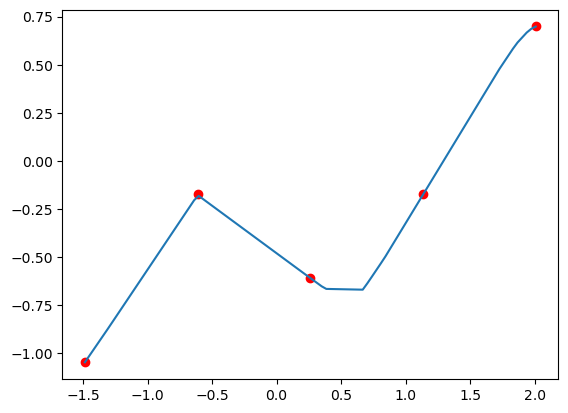

In [81]:
path = 'images'
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
data = [[1, 2], [3, 4], [5, 3], [7, 4], [9, 6]]
data = np.array(data)
data = normalize(data)
points = dataset(data)
point_loader = DataLoader(dataset, batch_size=1, shuffle=False)
model = regression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
train()
make_gif()
